In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras import backend
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

In [ ]:
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
call_df=pd.read_csv('/content/drive/MyDrive/black_scholes_option_pricing/splitted_put_with_all_resources')
#put_df=pd.read_csv('/content/drive/MyDrive/black_scholes_option_pricing/Put_with_all_resources.csv')

In [ ]:
call_df=call_df.set_index(['Date'])

In [ ]:
call_df=call_df[call_df['Close']>1]

In [ ]:
call_df_OTM = call_df[call_df["Moneyness_put"]=="ATM"]
call_df_OTM.drop(["Moneyness_put"], axis=1, inplace=True)
call_df = call_df_OTM

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
def linear_regression(df):
  x=np.array(df['Close']).reshape(-1,1)
  y=np.array(df['bs_call']).reshape(-1,1)
  reg=LinearRegression().fit(x,y)
  mse= mean_absolute_error(x,y)
  return reg.score(x,y),ms

In [ ]:
def regression(df):
  sns.scatterplot(x=df['Close'],y=df['bs_call'],hue=df['Expiration'])

In [ ]:
call_df.head()

,Unnamed: 0,Strike Price,Close,Expiration,Adj Close,return,volatility,Price,bs_call,svol,Vix,gold_price,crude_price
Date,,,,,,,,,,,,,
2013-12-31,5,6300,80.85,30,6304.000000,0.002051,0.135503,8.820,74.553485,0.006838,15.08,1201.900024,98.419998
2013-12-31,6,6400,124.50,30,6304.000000,0.002051,0.135503,8.820,124.967350,0.006838,15.08,1201.900024,98.419998
2014-01-03,11,6200,74.55,27,6211.149902,-0.001607,0.133806,8.834,66.373778,0.006800,16.55,1238.400024,93.959999
2014-01-03,12,6300,120.00,27,6211.149902,-0.001607,0.133806,8.834,116.428700,0.006800,16.55,1238.400024,93.959999
2014-01-06,17,6100,50.50,24,6191.450195,-0.003172,0.133634,8.783,35.255139,0.006786,15.87,1237.800049,93.430000


In [ ]:
def split_data(df):
  call_X_train, call_X_test, call_y_train, call_y_test = train_test_split(df[['Strike Price','Expiration','Adj Close','Price','volatility','Vix','gold_price','crude_price']],df['Close'],test_size=0.2,random_state=42)
  return call_X_train, call_X_test, call_y_train, call_y_test

In [ ]:
call_X_train, call_X_test, call_y_train, call_y_test=split_data(call_df)

In [ ]:
n_units = 400
layers = 5
n_batch = 100
n_epochs = 20

In [ ]:
model = Sequential()
model.add(Dense(n_units, input_dim=call_X_train.shape[1]))
model.add(LeakyReLU())

for _ in range(layers - 1):
    model.add(Dense(n_units))
    model.add(LeakyReLU())

model.add(Dense(1, activation='relu'))
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss='mse', optimizer=opt)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 400)               3600      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 400)               160400    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 400)               160400    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 400)              

In [ ]:
history = model.fit(call_X_train, call_y_train, 
                    batch_size=n_batch, epochs=n_epochs, 
                    validation_split = 0.2,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/20
51/51 [==============================] - 13s 22ms/step - loss: 30927.5927 - val_loss: 30954.2129
Epoch 2/20
51/51 [==============================] - 1s 11ms/step - loss: 31531.2251 - val_loss: 30954.2129
Epoch 3/20
51/51 [==============================] - 1s 10ms/step - loss: 32504.2288 - val_loss: 30954.2129
Epoch 4/20
51/51 [==============================] - 1s 11ms/step - loss: 31728.0861 - val_loss: 30954.2129
Epoch 5/20
51/51 [==============================] - 1s 11ms/step - loss: 31498.9038 - val_loss: 30954.2129
Epoch 6/20
51/51 [==============================] - 1s 11ms/step - loss: 31996.2811 - val_loss: 30954.2129
Epoch 7/20
51/51 [==============================] - 1s 11ms/step - loss: 34210.4769 - val_loss: 30954.2129
Epoch 8/20
51/51 [==============================] - 1s 10ms/step - loss: 32542.6340 - val_loss: 30954.2129
Epoch 9/20
51/51 [==============================] - 1s 11ms/step - loss: 31281.8290 - val_loss: 30954.2129
Epoch 10/20
51/51 [=================

In [ ]:
call_y_pred = model.predict(call_X_test)

In [ ]:
x=np.array(call_y_test).reshape(-1,1)
y=np.array(call_y_pred).reshape(-1,1)
reg=LinearRegression().fit(x,y)
mae= mean_absolute_error(x,y)
mse=mean_squared_error(x,y)

In [ ]:
print(reg.score(x,y),mae,mse)

1.0 142.30447667087012 29987.206901008823


In [ ]:
Explained_VAR=1-(np.std(x)/np.std(y))
Explained_VAR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


-inf

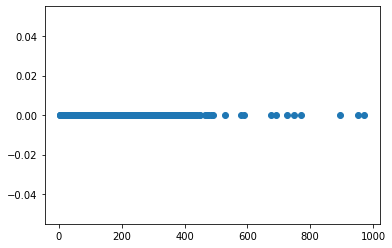

In [ ]:
plt.scatter(x,y)

In [ ]:
def split_data_bs(df):
  call_X_train, call_X_test, call_y_train, call_y_test = train_test_split(df[['Strike Price','Expiration','Adj Close','Price']],df['bs_call'],test_size=0.2,random_state=42)
  return call_X_train, call_X_test, call_y_train, call_y_test

In [ ]:
call_X_train_bs, call_X_test_bs, call_y_train_bs, call_y_test_bs=split_data_bs(call_df)


In [ ]:
x_bs=np.array(call_y_test).reshape(-1,1)
y_bs=np.array(call_y_test_bs).reshape(-1,1)
reg_bs=LinearRegression().fit(x_bs,y_bs)
mae_bs= mean_absolute_error(x_bs,y_bs)
mse_bs=mean_squared_error(x_bs,y_bs)

ValueError: ignored

In [ ]:
print(reg_bs.score(x_bs,y_bs),mae_bs,mse_bs)


In [ ]:
Explained_VAR_bs=1-(np.std(x_bs)/np.std(y_bs))
Explained_VAR_bs

In [ ]:
plt.scatter(x_bs,y_bs)